# *Modeling Part: Random Forest*

****************************************************************************************************************************************

In [ ]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score


dl.dropboxusercontent.com

In [ ]:
url_final = 'https://dl.dropboxusercontent.com/scl/fi/vhc8mgzyrhpaprncrlql5/final_all_defects.csv?rlkey=c0mqe7erfhss29s7wwf3aac3c&dl=1'
df_final = pd.read_csv(url_final)

In [ ]:
df_final.shape

(299384, 51)

In [ ]:
df_final.head()

,COIL,DATE,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,PYRO_2_FRST_3_ZONE,LASER_FRN_1,LASER_FRN_2,LASER_FRN_8,LASER_FRN_9,...,FILL_BENDING_POS,FILL_BENDING_NEG,MT_ADJUSTED,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,Has_Defect
0,240627,2019-03-15,14:25:23.060,-1.698350,-6.480611,-6.260562,-1.108191,-2.389473,-3.811867,-2.455160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,240627,2019-03-15,14:25:53.060,-1.712668,-6.518866,-6.253058,-1.108199,-2.376155,-3.795318,-2.455455,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,240627,2019-03-15,14:26:23.060,-2.213529,-6.513475,-6.261373,-1.108177,-2.369908,-3.783512,-2.455522,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,240627,2019-03-15,14:27:08.060,-2.212934,-6.484467,-6.161300,-1.108188,-2.340920,-3.760286,-2.455393,...,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,240627,2019-03-15,14:27:38.060,-1.811965,-6.445186,-5.887232,-1.108134,-2.305111,-3.712663,-2.454928,...,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-7-68f4ee91acab>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[df_transformed['Has_Defect'] == 0]['TEMP_Z1_log'], label='No Defect', shade=True)
<ipython-input-7-68f4ee91acab>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[df_transformed['Has_Defect'] == 1]['TEMP_Z1_log'], label='Defect', shade=True)


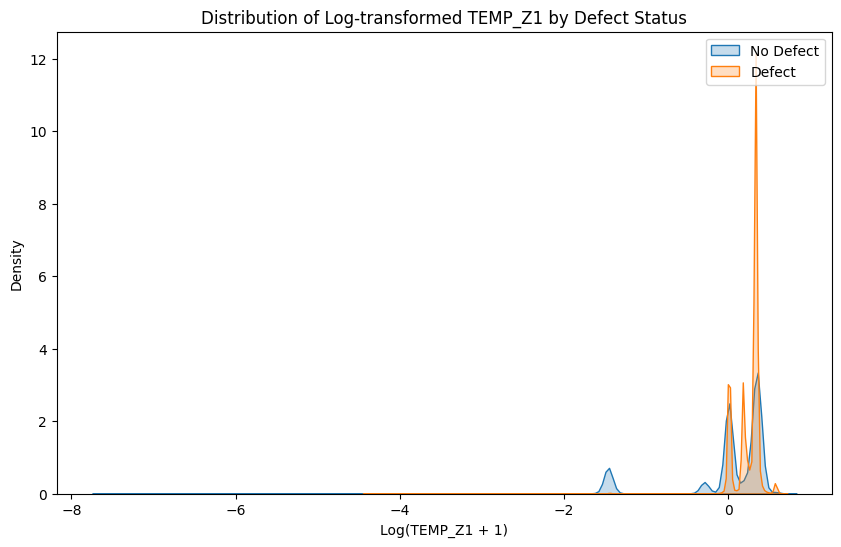

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame for the transformed data
df_transformed = df_final.copy()

# Apply logarithmic transformation to 'TEMP_Z1' column
df_transformed['TEMP_Z1_log'] = df_transformed['TEMP_Z1'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Plot the distribution curves
plt.figure(figsize=(10, 6))
sns.kdeplot(df_transformed[df_transformed['Has_Defect'] == 0]['TEMP_Z1_log'], label='No Defect', shade=True)
sns.kdeplot(df_transformed[df_transformed['Has_Defect'] == 1]['TEMP_Z1_log'], label='Defect', shade=True)
plt.xlabel('Log(TEMP_Z1 + 1)')  # Adding 1 to the label for clarity
plt.ylabel('Density')
plt.title('Distribution of Log-transformed TEMP_Z1 by Defect Status')
plt.legend()
plt.show()

In [ ]:
# Count occurrences of 1 in each column
count_type_1 = df_final['DIF_TIPO_1'].eq(1).sum()
count_type_2 = df_final['DIF_TIPO_2'].eq(1).sum()
count_type_3 = df_final['DIF_TIPO_3'].eq(1).sum()
count_type_4 = df_final['DIF_TIPO_4'].eq(1).sum()
count_type_5 = df_final['DIF_TIPO_5'].eq(1).sum()
count_type_6 = df_final['DIF_TIPO_6'].eq(1).sum()

print("Count of 1 in 'DIF_TIPO_1':", count_type_1)
print("Count of 1 in 'DIF_TIPO_2':", count_type_2)
print("Count of 1 in 'DIF_TIPO_3':", count_type_3)
print("Count of 1 in 'DIF_TIPO_4':", count_type_4)
print("Count of 1 in 'DIF_TIPO_5':", count_type_5)
print("Count of 1 in 'DIF_TIPO_6':", count_type_6)

Count of 1 in 'DIF_TIPO_1': 6668
Count of 1 in 'DIF_TIPO_2': 10492
Count of 1 in 'DIF_TIPO_3': 86585
Count of 1 in 'DIF_TIPO_4': 51852
Count of 1 in 'DIF_TIPO_5': 7584
Count of 1 in 'DIF_TIPO_6': 7148


**'df_final'** is now our final dataframe with the selected features and the target column of interest ('Has_Defect') at the end

#### Splitting our data into Train, Validation and Test sets

To ensure that the same coils are not split across both the training and testing sets, thereby preventing data leakage, we need to stratify the split based on the coil ID. This means we should split our dataset in such a way that all records belonging to a specific coil are either entirely in the training set or entirely in the testing set

In [ ]:
# Get unique coil IDs and split them
unique_coils = df_final['COIL'].unique()
train_coils, test_coils = train_test_split(unique_coils, test_size=0.2, random_state=42)
train_coils, val_coils = train_test_split(train_coils, test_size=0.25, random_state=42)  # Splitting the remaining 80% into 60% train and 20% validation

# Split the DataFrame into training, validation, and testing sets based on coil IDs
train_df = df_final[df_final['COIL'].isin(train_coils)]
val_df = df_final[df_final['COIL'].isin(val_coils)]
test_df = df_final[df_final['COIL'].isin(test_coils)]


In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(177863, 51)
(60333, 51)
(61188, 51)


In [ ]:
target = "Has_Defect"

# Prepare the data
X_train = train_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6', target], axis=1)
y_train = train_df[target]

X_val = val_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS','DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6', target], axis=1)
y_val = val_df[target]

X_test = test_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6', target], axis=1)
y_test = test_df[target]

In [ ]:
#check balance of data for training
value_counts_ytrain = y_train.value_counts()
percentages = (value_counts_ytrain / len(y_train)) * 100
print(percentages)

Has_Defect
0.0    64.673934
1.0    35.326066
Name: count, dtype: float64


In [ ]:
#check balance of data for validation
value_counts_yval = y_val.value_counts()
percentages_val = (value_counts_yval / len(y_val)) * 100
print(percentages_val)

Has_Defect
0.0    66.537384
1.0    33.462616
Name: count, dtype: float64


In [ ]:
#check balance of data for test
value_counts_ytest = y_test.value_counts()
percentages_test = (value_counts_ytest / len(y_test)) * 100
print(percentages_test)

Has_Defect
0.0    62.322678
1.0    37.677322
Name: count, dtype: float64


### Random Forest

Optimized Hyperparameter Tuning for Random Forest Classifier with Reduced Computational Complexity

In [ ]:
# Initialize the classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# parameters = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum number of levels in each decision tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of data points placed in a node before the node is split
#     'min_samples_leaf': [1, 2, 4]     # Minimum number of data points allowed in a leaf node
# }

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           scoring='recall', cv=3, n_jobs=1, verbose=2)

# Assuming X_train and y_train are your training features and labels
grid_search.fit(X_train, y_train)

# Get the best parameters and use them to create the best model
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Fit the best model
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Create a Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=12, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=10)

# Perform randomized search on your data
random_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Print the best score found
print("Best score:", random_search.best_score_)

# Get the best parameters and use them to create the best model
best_params = random_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Fit the best model
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 166}
Best score: 0.6360345007643041


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Validation Accuracy: 0.7716175227487445
Testing Accuracy: 0.7968065633784402

**Classification report for Random Forest Classifier on the test set:**

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83     38134
         1.0       0.69      0.84      0.76     23054

    accuracy                           0.80     61188
   macro avg       0.79      0.81      0.79     61188
weighted avg       0.81      0.80      0.80     61188



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier on the test set')

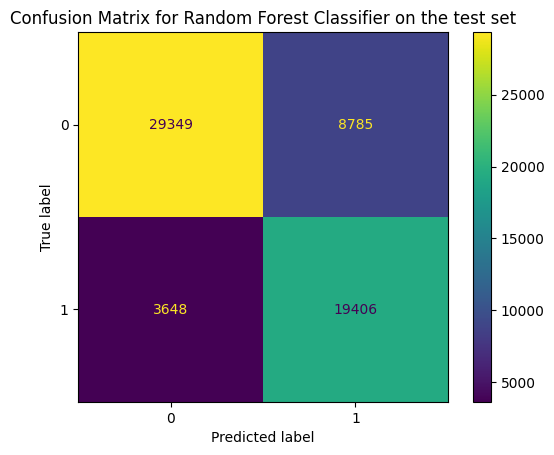

In [ ]:
# Predict on the validation set
y_val_pred = best_rf.predict(X_val)
# Calculate the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# Predict on the test set
y_test_pred = best_rf.predict(X_test)
# Calculate the accuracy of the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}\n")

# Print out the classification report which provides a summary of the model's performance
print("**Classification report for Random Forest Classifier on the test set:**\n")
print(classification_report(y_test, y_test_pred))

# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest Classifier on the test set')


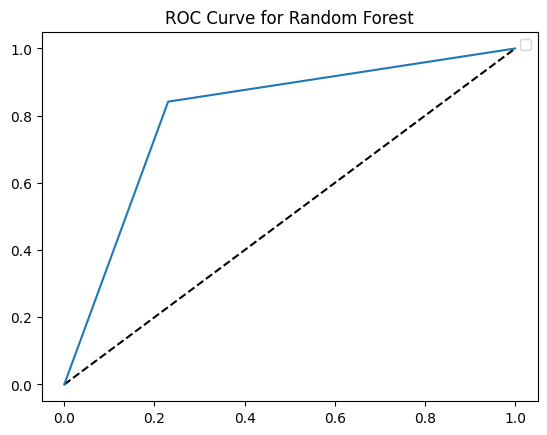

In [ ]:
# Plot the ROC curve for Random Forest
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_test_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

In [ ]:
# Feature importances for the Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Summary of feature importance
summary_imp = pd.DataFrame(list(zip(X_train.columns, feature_importances_rf)), columns=["Feature", "Importance"])
summary_imp = pd.DataFrame(summary_imp.sort_values(by="Importance", ascending=False))
print("Summary of feature importance:")
print(summary_imp)


Summary of feature importance:
                 Feature  Importance
1                TEMP_Z1    0.153107
2     PYRO_2_FRST_3_ZONE    0.095990
14              AIR_Z2_1    0.075179
21          LASER_RAFF_9    0.048871
36             FILL_TIRO    0.041587
13              AIR_Z1_1    0.040493
16            TIRO_FORNO    0.037092
0          SPEED_PROCESS    0.037088
37              FILL_ALL    0.031285
9              AIR_CH4_3    0.028337
25            ELET_H2SO4    0.028300
8              AIR_CH4_2    0.027791
3            LASER_FRN_1    0.026843
20                 EXT_1    0.026795
26              ELET_FE2    0.025623
28             DEC_H2SO4    0.023240
29               DEC_FE2    0.022250
33           SPZ1_R1_ASS    0.020822
5            LASER_FRN_8    0.018276
30               DEC_FE3    0.018237
10             AIR_CH4_4    0.017652
7              AIR_CH4_1    0.016778
4            LASER_FRN_2    0.016152
6            LASER_FRN_9    0.015618
15  FRN_FURNACE_PRESSURE    0.013739
35     

In [ ]:
summary_imp.to_excel("summary_imp.xlsx", index=False)

<ipython-input-34-856f188fd10c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_imp["Importance (%)"], y=summary_imp["Feature"], palette=palette, edgecolor='none')  # Removed border


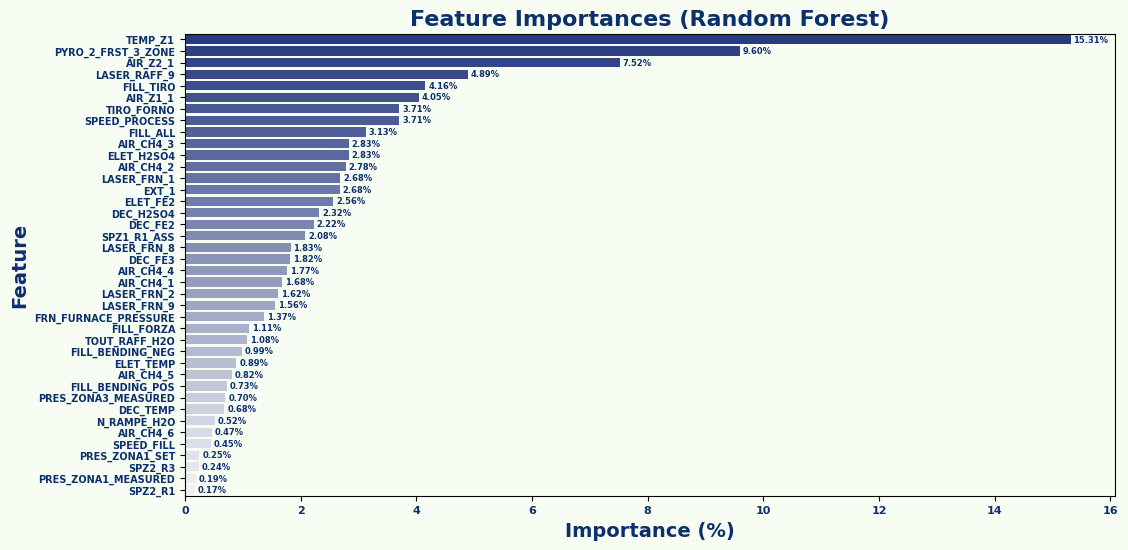

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize importances to percentages
summary_imp["Importance (%)"] = (summary_imp["Importance"] / summary_imp["Importance"].sum()) * 100

# Generate a color palette with gradually lighter shades
palette = sns.light_palette("#193390", n_colors=len(summary_imp), reverse=True)

plt.figure(figsize=(12, 6))
# Plot bar chart with adjusted text size, color, and transparency
sns.barplot(x=summary_imp["Importance (%)"], y=summary_imp["Feature"], palette=palette, edgecolor='none')  # Removed border
plt.title("Feature Importances (Random Forest)", color="#0C306D", fontsize=16, fontweight='bold')
# Adjust x-axis label font properties
plt.xlabel("Importance (%)", color="#0C306D", fontsize=14, fontweight='bold')
# Adjust y-axis label font properties
plt.ylabel("Feature", color="#0C306D", fontsize=14, fontweight='bold')
# Adjust tick labels font properties
plt.xticks(fontsize=8, color="#0C306D", fontweight='bold')
plt.yticks(fontsize=7, color="#0C306D", fontweight='bold')
# Set background color
plt.gca().set_facecolor("#F7FDF2")
# Set background color of figure
plt.gcf().set_facecolor("#F7FDF2")

# Add value labels beside each bar in % format
for i, v in enumerate(summary_imp["Importance (%)"]):
    plt.text(v + 0.05, i, f"{v:.2f}%", color='#0C306D', va='center', fontsize=6, fontweight='bold')

# Show plot
plt.show()

In [ ]:
X_new = df_final.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', 'DIF_TIPO_1',\
                                  'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6', target], axis=1)


In [ ]:
# Create predictions for our dataset
defect_predictions = best_rf.predict(X_new)


In [ ]:
# Add prediction to 'df_final' dataset
df_final['Defect_Predictions'] = defect_predictions


In [ ]:
# Add a column for misclassified instances if the predicted label is different from actual label
df_final['Misclassified'] = df_final['Has_Defect'] != df_final['Defect_Predictions']

In [ ]:
# Check how many misclassifications are there?
misclassified_count = df_final['Misclassified'].sum()
print("Number of Misclassified Instances:", misclassified_count)

# Create a df subset for only misclassified instances
misclassified_defects = df_final[df_final['Misclassified'] == True][['Has_Defect', 'Defect_Predictions','DIF_TIPO_1',\
                                  'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']]
misclassified_defects.head()

Number of Misclassified Instances: 38878


,Has_Defect,Defect_Predictions,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
656,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Count occurrences of 1 in each column
count_type_1 = misclassified_defects['DIF_TIPO_1'].eq(1).sum()
count_type_2 = misclassified_defects['DIF_TIPO_2'].eq(1).sum()
count_type_3 = misclassified_defects['DIF_TIPO_3'].eq(1).sum()
count_type_4 = misclassified_defects['DIF_TIPO_4'].eq(1).sum()
count_type_5 = misclassified_defects['DIF_TIPO_5'].eq(1).sum()
count_type_6 = misclassified_defects['DIF_TIPO_6'].eq(1).sum()

print("Count of 1 in 'DIF_TIPO_1':", count_type_1)
print("Count of 1 in 'DIF_TIPO_2':", count_type_2)
print("Count of 1 in 'DIF_TIPO_3':", count_type_3)
print("Count of 1 in 'DIF_TIPO_4':", count_type_4)
print("Count of 1 in 'DIF_TIPO_5':", count_type_5)
print("Count of 1 in 'DIF_TIPO_6':", count_type_6)

Count of 1 in 'DIF_TIPO_1': 482
Count of 1 in 'DIF_TIPO_2': 1142
Count of 1 in 'DIF_TIPO_3': 6041
Count of 1 in 'DIF_TIPO_4': 3557
Count of 1 in 'DIF_TIPO_5': 842
Count of 1 in 'DIF_TIPO_6': 308


In [ ]:
#Subdivide this new dataframe into two dataframes: one for the actual defects and one for the non-defects
false_negative = misclassified_defects[misclassified_defects['Defect_Predictions'] == 0]
false_positive = misclassified_defects[misclassified_defects['Defect_Predictions'] == 1]

# Print out some information about each dataframe
print("Number of False Negatives:", false_negative.shape[0])
print("Number of False Positives:", false_positive.shape[0])


Number of False Negatives: 8441
Number of False Positives: 30437


In [ ]:
false_positive[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']].value_counts()

DIF_TIPO_1  DIF_TIPO_2  DIF_TIPO_3  DIF_TIPO_4  DIF_TIPO_5  DIF_TIPO_6
0.0         0.0         0.0         0.0         0.0         0.0           30437
Name: count, dtype: int64

### False Negatives

In [ ]:
# Number of defects of type 1 in the false negatives
fn_type1 = false_negative['DIF_TIPO_1'].sum()
fn_type2 = false_negative['DIF_TIPO_2'].sum()
fn_type3 = false_negative['DIF_TIPO_3'].sum()
fn_type4 = false_negative['DIF_TIPO_4'].sum()
fn_type5 = false_negative['DIF_TIPO_5'].sum()
fn_type6 = false_negative['DIF_TIPO_6'].sum()
print(fn_type1, fn_type2, fn_type3, fn_type4, fn_type5, fn_type6)


482.0 1142.0 6041.0 3557.0 842.0 308.0


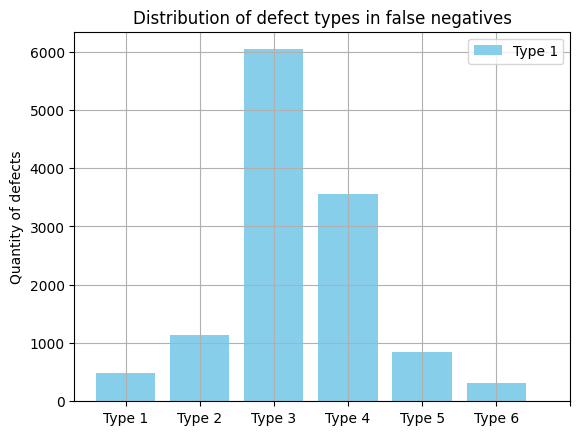

In [ ]:
plt.bar(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6'], \
        [fn_type1, fn_type2, fn_type3, fn_type4, fn_type5, fn_type6], color = 'skyblue')
plt.xticks([x for x in range(0, 7)])
plt.ylabel('Quantity of defects')
plt.title('Distribution of defect types in false negatives')
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6'])
plt.grid(True)
plt.show()

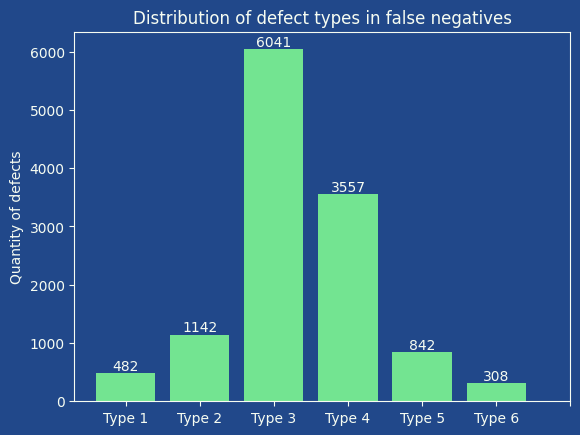

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined fn_type1, fn_type2, ..., fn_type6

total_defects = sum([fn_type1, fn_type2, fn_type3, fn_type4, fn_type5, fn_type6])

plt.bar(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6'], \
        [fn_type1, fn_type2, fn_type3, fn_type4, fn_type5, fn_type6], color='#73E491')

plt.xticks([x for x in range(0, 7)], color='#F7FDF2')
plt.yticks(color='#F7FDF2')
plt.ylabel('Quantity of defects', color='#F7FDF2')
plt.title('Distribution of defect types in false negatives', color='#F7FDF2')

for i in range(6):
    count_label = int([fn_type1, fn_type2, fn_type3, fn_type4, fn_type5, fn_type6][i])
    percent_label = round(count_label / total_defects * 100, 2)
    plt.text(i, count_label + 50, f"{count_label}", ha='center', color='#F7FDF2')

# Set background color
plt.gca().set_facecolor("#21488A")
# Set background color of figure
plt.gcf().set_facecolor("#21488A")

# Change border color
plt.gca().spines['bottom'].set_color('#F7FDF2')
plt.gca().spines['left'].set_color('#F7FDF2')
plt.gca().spines['top'].set_color('#F7FDF2')
plt.gca().spines['right'].set_color('#F7FDF2')

# Change tick marks color
plt.tick_params(axis='x', colors='#F7FDF2')
plt.tick_params(axis='y', colors='#F7FDF2')

plt.show()